<a href="https://colab.research.google.com/github/valeparrag/slangInternChallenge/blob/master/Final_Version_Customer_Type_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Customer-Type Model**

Contains: 

*   Data Import
*   Model
*   Results Display




In [1]:
#@title Import Requires Libraries
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
import numpy as np
import numpy as np
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score
import xgboost as xgb
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import time

from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MultiLabelBinarizer

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

from statistics import mean

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, classification_report 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

import joblib
from sklearn import svm
from sklearn.preprocessing import PowerTransformer
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Model Trainning

In [2]:
#@title Model

# Load dataset
df = pd.read_csv("/content/MO_500.csv")

# Make test split 
scaler = StandardScaler()
scaler= PowerTransformer()
df[df.columns[:-1].tolist()] = scaler.fit_transform(df[df.columns[:-1].tolist()])
X, y = df.iloc[:,:-1], df.iloc[:,-1] 
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Model Parameters 
k=30.85 
lr0= 0.2301
md0=  2.002
mds0= 7.442
nes0 = 819.1


# Define modeling pipeline
model0 = XGBClassifier(max_delta_step=int(round(mds0)) ,n_estimators=int(round(nes0)), learning_rate=lr0, n_jobs=-1, max_depth=int(round(md0)))
model = OneVsRestClassifier(model0) 


ros = RandomOverSampler(random_state=0, sampling_strategy='auto')
rus = RandomUnderSampler(random_state=0, sampling_strategy='auto')
imputer = KNNImputer(n_neighbors=int(round(k)))
pipeline = Pipeline(steps=[('i', imputer),('ros', ros), ('rus', rus),('m', model)])

# Evaluate Optimized Model
pipeline.fit(X_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(memory=None,
         steps=[('i',
                 KNNImputer(add_indicator=False, copy=True,
                            metric='nan_euclidean', missing_values=nan,
                            n_neighbors=31, weights='uniform')),
                ('ros',
                 RandomOverSampler(random_state=0, ratio=None,
                                   return_indices=False,
                                   sampling_strategy='auto')),
                ('rus',
                 RandomUnderSampler(random_state=0, ratio=None,
                                    replacement=False, return_indices=False,
                                    sampling_...
                                                             colsample_bylevel=1,
                                                             colsample_bynode=1,
                                                             colsample_bytree=1,
                                                             gamma=0,
                        

In [19]:
# Load dataset
df = pd.read_csv("/content/MO_500.csv")

# Make test split 
scaler = StandardScaler()
scaler= PowerTransformer()
df[df.columns[:-1].tolist()] = scaler.fit_transform(df[df.columns[:-1].tolist()])
X, y = df.iloc[:,:-1], df.iloc[:,-1] 
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_test = imputer.fit_transform(X_test)
X_test1, y_test1 = ros.fit_resample(X_test, y_test)
X_test, y_test = rus.fit_resample(X_test1, y_test1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Results


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


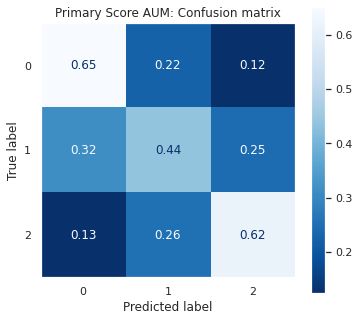

0.5977766548762001
0.5977766548762001


<Figure size 410.4x379.44 with 0 Axes>

In [ ]:
#@title Confusion Matrix

sns.set(rc={'figure.figsize':(5.7,5.27)})

matrix2 = plot_confusion_matrix(pipeline, X_test, y_test,
                                 cmap=plt.cm.Blues_r,
                                 normalize='true')
plt.grid(False)
plt.title('Primary Score AUM: Confusion matrix')
plt.show(matrix2)
plt.show()

plt.figure()

# Score of classification accuracy
score= pipeline.score(X_test, y_test)
print(score) 

No handles with labels found to put in legend.


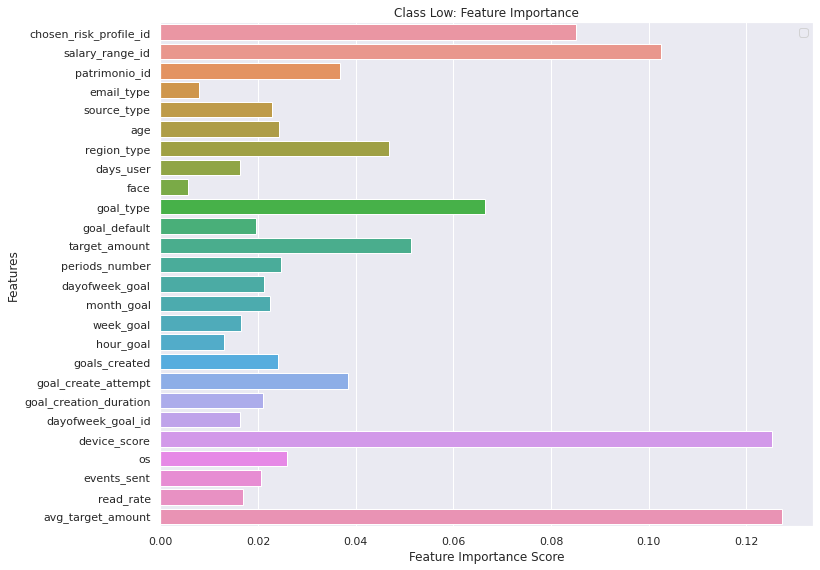

In [ ]:
#@title Feature Imporances

# Feature Importances for Class Low
sns.set(rc={'figure.figsize':(11.7,9.27)})
df = pd.read_csv("/content/MO-500.csv")
names = df.columns[:-1]

fi_1 = pipeline.steps[3][1].estimators_[0].feature_importances_
sns.barplot(x=fi_1, y=names)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Class Low: Feature Importance")
plt.legend()
plt.show()

No handles with labels found to put in legend.


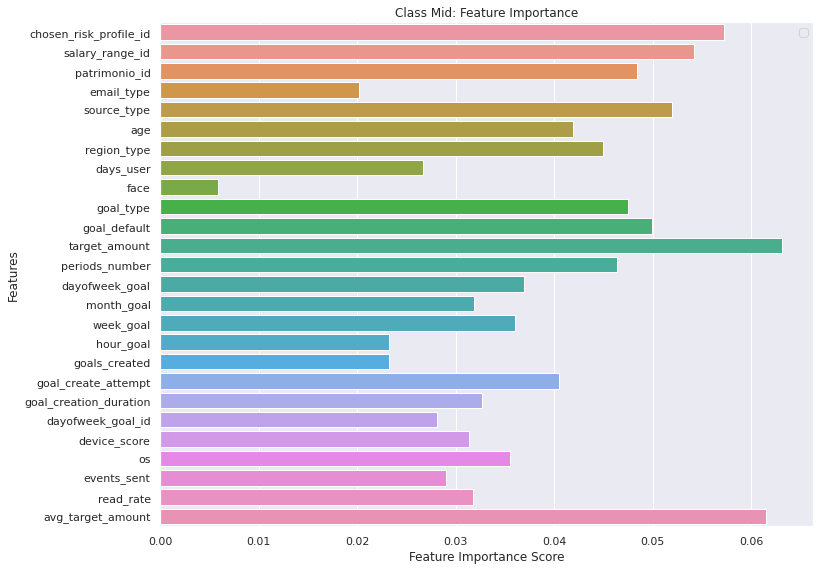

In [ ]:
# Feature Importances for Class Mid
sns.set(rc={'figure.figsize':(11.7,9.27)})
df = pd.read_csv("/content/MO-500.csv")
names = df.columns[:-1]

fi_1 = pipeline.steps[3][1].estimators_[1].feature_importances_
sns.barplot(x=fi_1, y=names)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Class Mid: Feature Importance")
plt.legend()
plt.show()

No handles with labels found to put in legend.


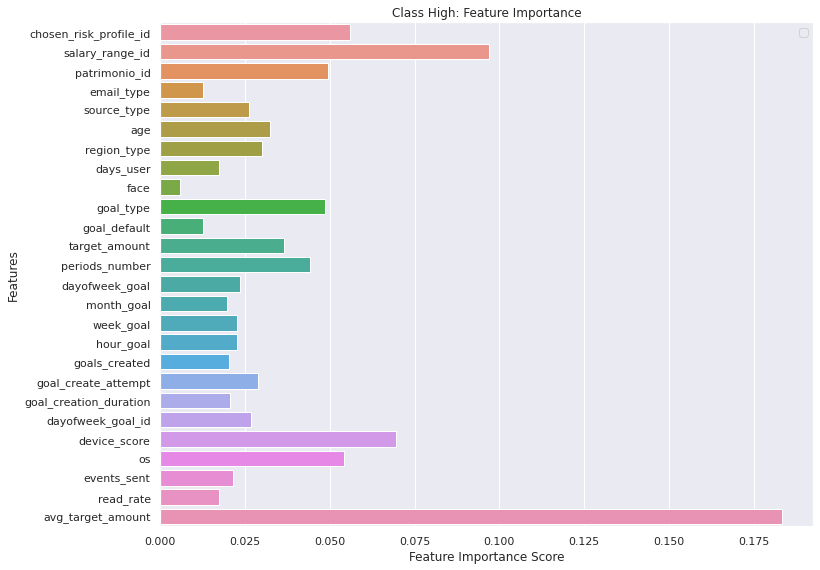

In [6]:
# Feature Importances for Class High
sns.set(rc={'figure.figsize':(11.7,9.27)})
df = pd.read_csv("/content/MO_500.csv")
names = df.columns[:-1]

fi_1 = pipeline.steps[3][1].estimators_[2].feature_importances_
sns.barplot(x=fi_1, y=names)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Class High: Feature Importance")
plt.legend()
plt.show()

In [ ]:
#@title Cross Validation

scores1 = cross_val_score(pipeline, X, y, cv=10)

Score 1: Accuracy per Fold: [0.60984848 0.61994949 0.6010101  0.59924147 0.61314791 0.60050569
 0.61694058 0.63337547 0.61188369 0.62199747]
Score 1: Mean Accuracy 0.6127900369050812


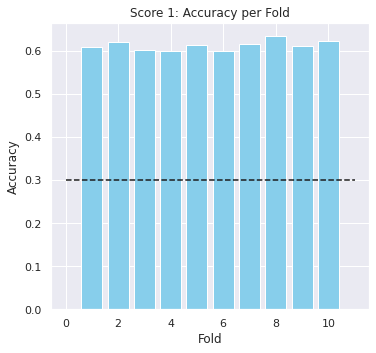

In [ ]:
#@title Cross Validation Results

fold=10
plt.title('Score 1: Accuracy per Fold')
plt.rcParams.update({'font.size': 14})
plt.bar(range(1,fold+1), scores1, color='skyblue')
plt.plot([0., 11], [0.3, 0.3], "k--")
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.savefig('AccuracyperFold.png')

print('Score 1: Accuracy per Fold:',scores1)
print('Score 1: Mean Accuracy', mean(scores1))

